In [146]:
import json

with open('all_scans_20190917.json') as f:
    data = json.loads(f.read())

In [147]:
print(len(data.keys()))
data.keys()

24


dict_keys(['leukecollega', 'dvprkag', 'rjktqve', 'fqrenpv', 'kbkzynx', 'tvfgunr', 'abelard', 'rkmwbhp', 'hwjcnfq', 'vsjvyva', 'phvmyzz', 'wbaarbz', 'mpkfrvf', 'zjckgfs', 'tarqssw', 'vudqpqd', 'brgpjzw', 'wouter', 'zvxeqta', 'yjvkqfz', 'knemxzf', 'mrnxwdd', 'cujkatv', 'vdvmpty'])

In [148]:
def get_syllables(fragm):
    instances = []
    for line in fragm:
        for word in line:
            for syll in word:
                instances.append(syll)
    return instances

In [149]:
for usr in data:
    print(f'- {usr} ({len(data[usr])} fragments)')
    for fragm in data[usr]:
        pass
#        print(get_syllables(data[usr][fragm]))
#        print(get_words(data[usr][fragm]))
#        print(get_lines(data[usr][fragm]))

- leukecollega (16 fragments)
- dvprkag (16 fragments)
- rjktqve (16 fragments)
- fqrenpv (16 fragments)
- kbkzynx (16 fragments)
- tvfgunr (16 fragments)
- abelard (16 fragments)
- rkmwbhp (16 fragments)
- hwjcnfq (16 fragments)
- vsjvyva (16 fragments)
- phvmyzz (16 fragments)
- wbaarbz (16 fragments)
- mpkfrvf (16 fragments)
- zjckgfs (16 fragments)
- tarqssw (16 fragments)
- vudqpqd (16 fragments)
- brgpjzw (16 fragments)
- wouter (16 fragments)
- zvxeqta (16 fragments)
- yjvkqfz (16 fragments)
- knemxzf (16 fragments)
- mrnxwdd (16 fragments)
- cujkatv (16 fragments)
- vdvmpty (16 fragments)


In [150]:
fragments = []
for usr in data:
    for fragm in data[usr]:
        fragments.append(fragm)
fragments = sorted(set(fragments))
print(fragments)

['ADoet_1', 'ADoet_2', 'AG_1', 'AG_2', 'Aiol_Vl_1', 'Aiol_Vl_2', 'BY1_1', 'BY5_1', 'BY7_1', 'BY7_2', 'Beatrijs_1', 'Beatrijs_2', 'BrRose_1', 'BrRose_2', 'BraKo1_1', 'BraKo1_2', 'Brandaen_1', 'Brandaen_2', 'Busk_1', 'Busk_2', 'Denem_1', 'Denem_2', 'DiDoc_1', 'DiDoc_2', 'DiDoc_3', 'Ferg_1', 'Ferg_2', 'Flandr_1', 'Flandr_2', 'FloBla_1', 'FloBla_2', 'Grale_1', 'Grale_2', 'GrimOorlog_1', 'GrimOorlog_2', 'Haghe_1', 'Haghe_2', 'Haghe_3', 'Heelal_1', 'Heelal_2', 'HerenPassie_1', 'HerenPassie_2', 'HerenPassie_3', 'JonRos_1', 'JonRos_2', 'Karel_1', 'Karel_2', 'Karel_3', 'Limb_Aiol_1', 'Limb_Aiol_2', 'Lutgart_1', 'Lutgart_2', 'Lutgart_3', 'Perc_1', 'Perc_2', 'Reynaert_1', 'Reynaert_2', 'Reynaert_3', 'Reynaert_4', 'RijmSpr_1', 'RijmSpr_2', 'RijmSpr_3', 'RijmSpr_4', 'RijmSpr_5', 'RijmSpr_6', 'RijmSpr_7', 'RoelRi_1', 'RoelRi_2', 'SpHMaerl_1', 'SpHMaerl_2', 'Torec_1', 'Torec_2', 'Troyen_1', 'Troyen_2', 'VlRose_1', 'VlRose_2', 'Walewein_1', 'Walewein_2', 'Woeringen_1', 'Woeringen_2']


In [151]:
import numpy as np
from statsmodels.stats.inter_rater import fleiss_kappa

In [152]:
results = []
majority = {}

for fragm in fragments:
    fragm_data = []
    for usr in data:
        if fragm in data[usr]:
            s = get_syllables(data[usr][fragm])
            fragm_data.append(s)
    fragm_data = np.array(fragm_data).transpose()
    ones = fragm_data.sum(axis=-1)
    zeros = 5 - fragm_data.sum(axis=-1)
    table = np.vstack((ones, zeros)).transpose()
    fleiss = fleiss_kappa(table, method='fleiss')
    title, idx = fragm.split('_', 1)
    results.append((title, idx, fleiss))
    
    # collect majority vote:
    majority[fragm] = [1 if o > 2.5 else 0 for o in ones]

In [153]:
import pandas as pd
df = pd.DataFrame(results, columns=('title', 'idx', 'fleiss'))
df

,title,idx,fleiss
0,ADoet,1,0.684931
1,ADoet,2,0.720320
2,AG,1,0.609096
3,AG,2,0.797333
4,Aiol,Vl_1,0.576094
5,Aiol,Vl_2,0.679024
6,BY1,1,0.653367
7,BY5,1,0.747885
8,BY7,1,0.431250
9,BY7,2,0.114256


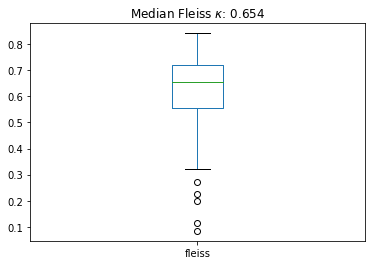

In [155]:
ax = df['fleiss'].plot.box()
ax.set_title(f"Median Fleiss $\kappa$: {round(df['fleiss'].median(), 3)}");

Borderline "substantial agreement" according to Landis and Koch (1977). The result is not impressive however, because of the low number of classes ($n=2$).
* 0.41 – 0.60	Moderate agreement
* 0.61 – 0.80	Substantial agreement

In [156]:
df.sort_values(by='fleiss')

,title,idx,fleiss
24,DiDoc,3,0.084511
9,BY7,2,0.114256
39,Heelal,2,0.199853
40,HerenPassie,1,0.226066
36,Haghe,2,0.271513
76,Walewein,1,0.320175
37,Haghe,3,0.392687
60,RijmSpr,2,0.411765
8,BY7,1,0.431250
77,Walewein,2,0.431630


In [157]:
df.groupby('title').mean().sort_values(by='fleiss')

,fleiss
title,
BY7,0.272753
Heelal,0.371992
Walewein,0.375903
Haghe,0.401026
GrimOorlog,0.507631
VlRose,0.525189
Perc,0.528812
DiDoc,0.537767
RoelRi,0.566063


## All at once?

In [158]:
fragments = []
for usr in data:
    for fragm in data[usr]:
        fragments.append(fragm)
fragments = sorted(set(fragments))
print(fragments)

['ADoet_1', 'ADoet_2', 'AG_1', 'AG_2', 'Aiol_Vl_1', 'Aiol_Vl_2', 'BY1_1', 'BY5_1', 'BY7_1', 'BY7_2', 'Beatrijs_1', 'Beatrijs_2', 'BrRose_1', 'BrRose_2', 'BraKo1_1', 'BraKo1_2', 'Brandaen_1', 'Brandaen_2', 'Busk_1', 'Busk_2', 'Denem_1', 'Denem_2', 'DiDoc_1', 'DiDoc_2', 'DiDoc_3', 'Ferg_1', 'Ferg_2', 'Flandr_1', 'Flandr_2', 'FloBla_1', 'FloBla_2', 'Grale_1', 'Grale_2', 'GrimOorlog_1', 'GrimOorlog_2', 'Haghe_1', 'Haghe_2', 'Haghe_3', 'Heelal_1', 'Heelal_2', 'HerenPassie_1', 'HerenPassie_2', 'HerenPassie_3', 'JonRos_1', 'JonRos_2', 'Karel_1', 'Karel_2', 'Karel_3', 'Limb_Aiol_1', 'Limb_Aiol_2', 'Lutgart_1', 'Lutgart_2', 'Lutgart_3', 'Perc_1', 'Perc_2', 'Reynaert_1', 'Reynaert_2', 'Reynaert_3', 'Reynaert_4', 'RijmSpr_1', 'RijmSpr_2', 'RijmSpr_3', 'RijmSpr_4', 'RijmSpr_5', 'RijmSpr_6', 'RijmSpr_7', 'RoelRi_1', 'RoelRi_2', 'SpHMaerl_1', 'SpHMaerl_2', 'Torec_1', 'Torec_2', 'Troyen_1', 'Troyen_2', 'VlRose_1', 'VlRose_2', 'Walewein_1', 'Walewein_2', 'Woeringen_1', 'Woeringen_2']


In [159]:
tables = []

for fragm in fragments:
    fragm_data = []
    for usr in data:
        if fragm in data[usr]:
            s = get_syllables(data[usr][fragm])
            fragm_data.append(s)
    fragm_data = np.array(fragm_data).transpose()
    ones = fragm_data.sum(axis=-1)
    zeros = 5 - fragm_data.sum(axis=-1)
    table = np.vstack((ones, zeros)).transpose()
    tables.append(table)

table = np.vstack(tables)
print(table.shape)
fleiss = fleiss_kappa(table, method='fleiss')
print(fleiss)

(3705, 2)
0.6250592366248987


## Compare majority vote to silver annotation

In [160]:
import glob
import os

silver = {}
for fn in glob.glob('silver/*.txt'):
    fragm = os.path.basename(fn).replace('.txt', '')
    annotations = []
    for line in open(fn):
        for item in json.loads(line):
            annotations.extend(item)
    silver[fragm] = annotations

In [161]:
results = []

for fragment in silver:
    try:
        s = np.array(silver[fragment])
        m = np.array(majority[fragment])
        b = np.vstack((s, m)).transpose()
        ones = b.sum(axis=-1)
        zeros = 2 - b.sum(axis=-1)
        table = np.vstack((ones, zeros)).transpose()
        fleiss = fleiss_kappa(table, method='fleiss')        
        title, idx = fragment.split('_', 1)
        results.append((title, idx, fleiss))
    except ValueError:
        print(f'shape mismatch in {fragment}')

shape mismatch in BY7_2
shape mismatch in Limb_Aiol_2


In [162]:
import pandas as pd
df = pd.DataFrame(results, columns=('title', 'idx', 'fleiss'))
df.sort_values(by='fleiss')

,title,idx,fleiss
51,DiDoc,3,-0.259259
48,Flandr,2,0.265734
77,ADoet,2,0.348693
43,Brandaen,1,0.394038
71,Haghe,1,0.403509
35,Brandaen,2,0.418103
32,BY7,1,0.419458
18,Torec,2,0.440362
28,Walewein,1,0.448529
68,RijmSpr,2,0.492063


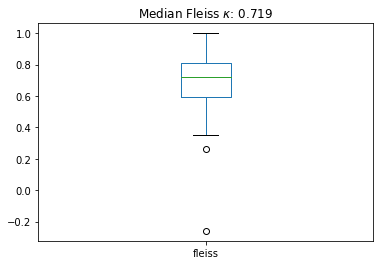

In [164]:
ax = df['fleiss'].plot.box()
ax.set_title(f"Median Fleiss $\kappa$: {round(df['fleiss'].median(), 3)}");

## All at once?

In [165]:
all_silver, all_majority = [], []

for fragment in silver:
    s = silver[fragment]
    m = majority[fragment]
    if len(s) == len(m):
        all_silver.extend(s)
        all_majority.extend(m)
    else:
        print(f'shape mismatch in {fragment}')

shape mismatch in BY7_2
shape mismatch in Limb_Aiol_2


In [166]:
b = np.vstack((all_silver, all_majority)).transpose()
ones = b.sum(axis=-1)
zeros = 2 - b.sum(axis=-1)
table = np.vstack((ones, zeros)).transpose()
fleiss = fleiss_kappa(table, method='fleiss')        
print('fleiss:', fleiss)

fleiss: 0.6793507653918817
